In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from CompressionCodecs import CompressionCodecs
from Codec import ShiftCodec, DCTCodec, QuantizationCodec, FastDCTCodec, MatrixDCTCodec, SlowDCTCodec
import numpy as np

In [4]:
A = np.array([[139, 144, 149, 153, 155, 155, 155, 155],
    [144, 151, 153, 156, 159, 156, 156, 156],
    [150, 155, 160, 163, 158, 156, 156, 156],
    [159, 161, 162, 160, 160, 159, 159, 159],
    [159, 160, 161, 162, 162, 155, 155, 155],
    [161, 161, 161, 161, 160, 157, 157, 157],
    [162, 162, 161, 163, 162, 157, 157, 157],
    [162, 162, 161, 161, 163, 158, 158, 158]], np.float32)
A = A.reshape([8, 8, 1])

In [5]:
qTable = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
        [12, 12, 14, 19, 26, 58, 60, 55],
        [14, 13, 16, 24, 40, 57, 69, 56],
        [14, 17, 22, 29, 51, 87, 80, 62],
        [18, 22, 37, 56, 68, 109, 103, 77],
        [24, 35, 55, 64, 81, 104, 113, 92],
        [49, 64, 78, 87, 103, 121, 120, 101],
        [72, 92, 95, 98, 112, 100, 103, 99]])
codecs = [ShiftCodec, DCTCodec, QuantizationCodec]
c = CompressionCodecs(codecs, k=1, qTable=qTable)
c.compress(A).reshape([8, 8])

array([[142, 143, 146, 149, 152, 153, 153, 153],
       [148, 150, 152, 154, 156, 156, 156, 156],
       [156, 157, 159, 160, 160, 159, 158, 157],
       [161, 162, 162, 162, 161, 160, 158, 156],
       [161, 162, 162, 162, 160, 158, 156, 154],
       [160, 160, 161, 161, 159, 157, 155, 154],
       [159, 160, 161, 161, 161, 160, 158, 157],
       [160, 161, 162, 163, 163, 162, 161, 160]], dtype=uint8)

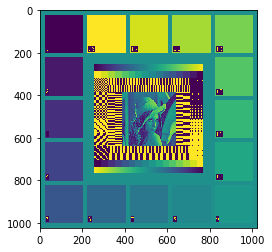

In [6]:
rgbImage = mpimg.imread('../images/Image1.bmp')
plt.imshow(rgbImage)

In [7]:
# matrix
codecs = [ShiftCodec, DCTCodec, QuantizationCodec]
c = CompressionCodecs(codecs, k=1, qTable=qTable)
compressedImage = rgbImage
import time
start = time.perf_counter()
for i in range(10):
    compressedImage = c.compress(compressedImage)
print(time.perf_counter()-start)

6.178443696


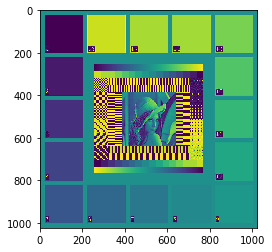

In [8]:
plt.imshow(compressedImage)

In [9]:
# fftpack
codecs = [ShiftCodec, FastDCTCodec, QuantizationCodec]
c = CompressionCodecs(codecs, k=1, qTable=qTable)
compressedImage = rgbImage
import time
start = time.perf_counter()
for i in range(10):
    compressedImage = c.compress(compressedImage)
print(time.perf_counter()-start)

15.161708025000003


In [10]:
# four-loop
codecs = [ShiftCodec, SlowDCTCodec, QuantizationCodec]
c = CompressionCodecs(codecs, k=1, qTable=qTable)
compressedImage = rgbImage
import time
start = time.perf_counter()
for i in range(1):
    compressedImage = c.compress(compressedImage)
print(time.perf_counter()-start)

280.473661799
